# Fashion Class Classification



*   This classifies the images in different category based on the products present in the image.
*   This model can be used for recommendation system by identifying the users intrest in type of products.
*   I have used Fashion-MNIST dataset with 70000 fashion images which are in 28x28 grayscale images.
*   Dataset consist of 10 classes.
*   Classification is done using the Convolutional Neural Network(CNN)









In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [105]:
train_df = pd.read_csv("/content/fashion-mnist_train.csv", sep = ',')
test_df = pd.read_csv("/content/fashion-mnist_test.csv", sep=',')
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
print(train_df.shape, test_df.shape)

(60000, 785) (10000, 785)


In [108]:
training = np.array(train_df, dtype='float32')
testing = np.array(test_df, dtype='float32')

Label 4.0


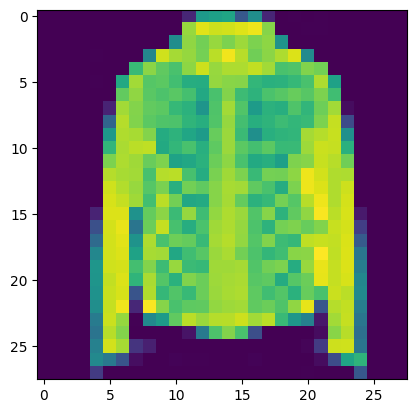

In [109]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28)) # ploting the image of ith row which contains the features/pixels of ith image by skipping the 1st column which is target column.
print("Label", training[i, 0])

**Data Spliting and formatting**

In [110]:
x_train = training[:, 1:] / 255
y_train = training[:, 0]

X_test = testing[:, 1:] / 255
y_test = testing[:, 0]

In [111]:
X_train, X_validate, Y_train, Y_validate = train_test_split(x_train, y_train, test_size=0.2)

In [112]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [113]:
print(X_train.shape, X_test.shape, X_validate.shape)

(48000, 28, 28, 1) (10000, 28, 28, 1) (12000, 28, 28, 1)


**Model Building**

In [114]:
model = Sequential()

In [115]:
model.add(Conv2D(32, 3,3,input_shape = (28,28,1), activation = 'relu'))  # convolutional layer
model.add(MaxPooling2D(pool_size = (2,2)))  # max pooling layer
model.add(Flatten())  # flattening layer
model.add(Dense(units = 32, activation = 'relu'))  # dence layer
model.add(Dense(units = 10, activation = 'relu'))  # output layer

In [124]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [125]:
epochs = 50
model.fit(X_train, Y_train, batch_size= 512, epochs = epochs, validation_data = (X_validate, Y_validate))

Epoch 1/50
94/94 [==============================] - 3s 12ms/step - loss: 2.2995 - accuracy: 0.1027 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 2/50
94/94 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 5/50
94/94 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 6/50
94/94 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 7/50
94/94 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 8/50
94/94 [=

**Evaluate The Model**

In [126]:
evaluation = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
